<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks

In [1]:
tensorflow_version 2.x


## Simple RNNs
## Word Embedding + RNN on IMDB



In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

inpt_dim =  128
index_from = 3

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from,
                                                      skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(' '.join(str(int(id)) for id in x_train[7]))

word_to_id = imdb.get_word_index()
word_to_id = {k:(v+index_from) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[7]))


17465344/17464789 [==============================] - 0s 0us/step
x_train shape: (25000, 128)
x_test shape: (25000, 128)
55 655 707 6371 956 225 1456 841 42 1310 225 2 2493 1467 7722 2828 21 2 2 2 364 23 2 2228 2407 225 24 76 133 2 2 189 2293 2 2 814 2 2 2 2642 2 47 2 682 364 352 168 44 2 45 24 913 93 21 247 2441 2 116 34 35 1859 2 72 177 2 164 2 901 344 44 2 191 135 2 126 421 233 2 259 2 2 2 2 6847 2 2 3074 2 112 199 753 357 39 63 2 115 2 763 2 2 35 3282 1523 65 57 599 2 1916 277 1730 37 25 92 202 2 8848 44 25 28 2 22 2 122 24 4171 72 33 32
1646592/1641221 [==============================] - 0s 0us/step
very middle class suburban setting there's zero atmosphere or mood there's <UNK> lesbian suggest incestuous kiss but <UNK> <UNK> <UNK> low on <UNK> exploitation scale there's not much here <UNK> <UNK> horror crowd <UNK> <UNK> filmed <UNK> <UNK> <UNK> california <UNK> has <UNK> modern low budget look about <UNK> it's not badly made but rather forgettable <UNK> acting by an unknown <UNK> m

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

seqnc_lngth =  128
embddng_dim = 64
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=seqnc_lngth)
x_test = sequence.pad_sequences(x_test, maxlen=seqnc_lngth)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# now with batch norm
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = SimpleRNN(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

# model that takes input and encodes it into the latent space
rnn = Model(inpt_vec, output)

rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.summary()


x_train shape: (25000, 128)
x_test shape: (25000, 128)
25000 train samples
25000 test samples
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 64)           640000    
_________________________________________________________________
dropout (Dropout)            (None, 128, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________________________

Epoch 1/1000
250/250 [==============================] - 14s 57ms/step - loss: 0.5917 - accuracy: 0.6749 - val_loss: 1.2764 - val_accuracy: 0.5008
Epoch 2/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.3508 - accuracy: 0.8439 - val_loss: 0.7823 - val_accuracy: 0.6118
Epoch 3/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.2532 - accuracy: 0.8974 - val_loss: 1.4494 - val_accuracy: 0.5842
Epoch 4/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.2209 - accuracy: 0.9103 - val_loss: 1.1953 - val_accuracy: 0.6531
Epoch 5/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.1677 - accuracy: 0.9368 - val_loss: 0.5372 - val_accuracy: 0.8117
Epoch 6/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.0998 - accuracy: 0.9639 - val_loss: 0.6341 - val_accuracy: 0.8325
Epoch 7/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.0606 - accuracy: 0.9780 - val_loss: 0.7278 -

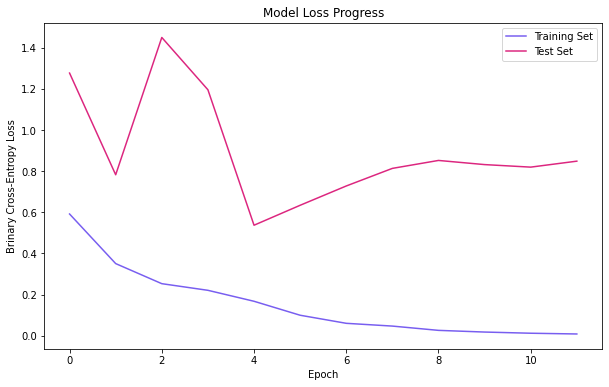

In [4]:
# Fitting the RNN to the data

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=7, 
                         restore_best_weights=True, verbose=1)

hist = rnn.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

rnn.save_weights("rnn.hdf5")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
# plt.savefig('ch.13.rnn.imdb.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [5]:
# Generate predictions
predictions = rnn.predict(x_train[0:8])
print(predictions)

for i in range(2):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(x_test[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in x_test[i] ))


[[9.9588227e-01]
 [1.2411210e-01]
 [5.8138072e-03]
 [9.9836600e-01]
 [2.3013234e-02]
 [2.6406199e-02]
 [9.9583995e-01]
 [1.9255280e-04]]
Sample = 0 | Length = 128
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> please give <UNK> one <UNK> miss <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> cast rendered terrible performances <UNK> show <UNK> flat flat flat <UNK> <UNK> <UNK> don't know how michael madison could have allowed <UNK> one on his plate he almost seemed <UNK> know <UNK> wasn't going <UNK> work out <UNK> his performance <UNK> quite <UNK> so all you madison fans give <UNK> <UNK> miss
Sample = 1 | Length = 128
young man regular altman player michael murphy has <

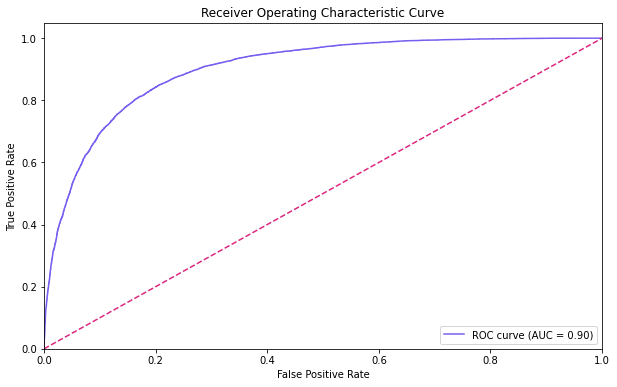

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_hat = rnn.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
# plt.savefig('ch.13.rnn.imdb.roc.png', dpi=350, bbox_inches='tight')
plt.show()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))